# Author: Akash Mitra
# Task 2: Prediction using unsupervised ML

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

## Importing Dataset

In [2]:
iris= datasets.load_iris()
dataset= pd.DataFrame(iris.data, columns= iris.feature_names)
X=dataset.iloc[:,[0,1,2,3]].values
dataset.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


## Finding no. of clusters using elbow method

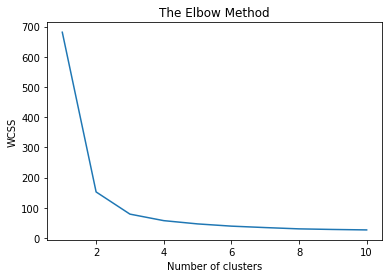

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training k_means model on dataset

In [4]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_means=kmeans.fit_predict(X)

## Visualising the clusters

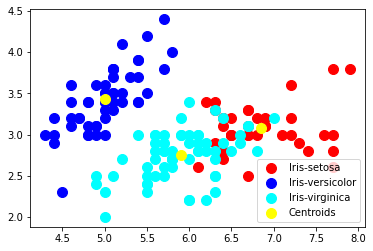

In [5]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='cyan',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100, c = 'yellow', label = 'Centroids')
plt.legend()